A dataset is required in order to train and test a neural network. Some standard datasets are provided as part of Keras (https://keras.io/datasets/) and can be easily loaded. For example, to load the MNIST dataset use the following python code:

In [1]:
from tensorflow.keras.datasets import mnist 
(x_train, labels_train), (x_test, labels_test) = mnist.load_data()

The MNIST images are stored in the form of integers with values in the range [0,255]. To convert to floating-point numbers in the range [0,1] use the following python code:

In [2]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

The category labels are in the form of integers 0 to 9. To define the output that the network should produce in response to each sample (a one hot encoding) use the following python code

In [3]:
from tensorflow.keras.utils import to_categorical
# convert class labels into one-hot encoded vectors
# only one element is 1 (indicating the presence of that category) 
# and all other elements are 0

y_train = to_categorical(labels_train,10)
y_test = to_categorical(labels_test,10)

This dataset consists of 70000 28-by-28 pixel images of handwritten digits, which are by convention split into 60000 images for training and 10000 for testing.

If the data is to be used as input to a dense layer, then it should be reshaped into a matrix where each row is a sample, using the following python code:

In [4]:
x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784)

If the data is to be used as input to a convolutional layer, then it should be reshaped into a fourdimensional matrix where the first dimension corresponds to the number of exemplars, the second and third dimensions correspond to the width and height of each image, and the fourth dimension corresponds to the number of colour channels in each image:

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

784 - [32C3-32C3-32C5S2] - [64C3-64C3-64C5S2] - 128 - 10
with 40% dropout, batch normalization, and data augmentation added

link: https://www.kaggle.com/code/cdeotte/how-to-choose-cnn-architecture-mnist

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator


import scipy
# Define data augmentation parameters
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        )

# Define CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (5, 5), strides=(2, 2), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization (Batch  (None, 12, 12, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 6, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 6, 6, 32)          0

In [7]:
# Train the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32,
                    epochs=20,
                    validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4715 - accuracy: 0.8536 - val_loss: 0.0591 - val_accuracy: 0.9818
Epoch 2/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1538 - accuracy: 0.9571 - val_loss: 0.0383 - val_accuracy: 0.9892
Epoch 3/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1216 - accuracy: 0.9678 - val_loss: 0.0289 - val_accuracy: 0.9906
Epoch 4/20
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1038 - accuracy: 0.9733 - val_loss: 0.0318 - val_accuracy: 0.9908
Epoch 5/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0872 - accuracy: 0.9776 - val_loss: 0.0258 - val_accuracy: 0.9927
Epoch 6/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0803 - accuracy: 0.9784 - val_loss: 0.0315 - val_accuracy: 0.9910
Epoch 7/20
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0769 - accuracy: 0.9800 - val_loss: 0.0231 -

In [8]:
model.save("myModelCrop.h5")

C:\Users\patta\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import scipy
from keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split

# Define data augmentation parameters
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    width_shift_range=0.1,
    height_shift_range=0.1)

# Define CNN model
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=3,
             activation='relu', input_shape=(28, 28, 1)))
model2.add(BatchNormalization())
model2.add(Conv2D(32, kernel_size=3, activation='relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32, kernel_size=5, strides=2,
             padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))

model2.add(Conv2D(64, kernel_size=3, activation='relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, kernel_size=3, activation='relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, kernel_size=5, strides=2,
             padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer="adam",
                 loss="categorical_crossentropy", metrics=["accuracy"])
model2.summary()
# Train the model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=["accuracy"])
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(
    x_train, y_train, test_size=0.1)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
history1 = model2.fit(datagen.flow(X_train2,Y_train2, batch_size=64),
                    steps_per_epoch=len(X_train2) // 64,
                    epochs=20,
                      validation_data=(X_val2, Y_val2))
model2.save("mymodel3.h5")#99.5


outputs = model2.predict(x_test)
labels_predicted = np.argmax(outputs, axis=1)
correct_classified = sum(labels_predicted == labels_test)
print('Percentage correctly classified MNIST= ', 100*correct_classified/labels_test.size) 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_23 (Ba  (None, 26, 26, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_25 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_24 (Ba  (None, 24, 24, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_26 (Conv2D)          (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_25 (Ba  (None, 12, 12, 32)       

C:\Users\patta\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 11ms/step
Percentage correctly classified MNIST=  99.5


313/313 [==============================] - 2s 6ms/step
Percentage misclassified =  0.39
1/1 [==============================] - 0s 13ms/step


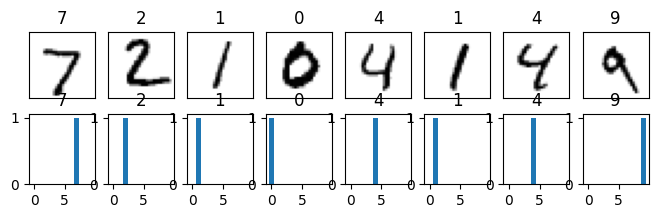

In [10]:
import numpy as np
import matplotlib.pyplot as plt
outputs=model.predict(x_test)
labels_predicted=np.argmax(outputs, axis=1)
misclassified=sum(labels_predicted!=labels_test)
print('Percentage misclassified = ',100*misclassified/labels_test.size)
plt.figure(figsize=(8, 2))
for i in range(0,8):
    ax=plt.subplot(2,8,i+1)
    plt.imshow(x_test[i,:].reshape(28,28), cmap=plt.get_cmap('gray_r'))
    plt.title(labels_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
for i in range(0,8):
    # output = net.predict(x_test[i,:].reshape(1, 784)) #if MLP
    output = model.predict(x_test[i,:].reshape(1, 28,28,1)) #if CNN
    output=output[0,0:]
    plt.subplot(2,8,8+i+1)
    plt.bar(np.arange(10.),output)
    plt.title(np.argmax(output))

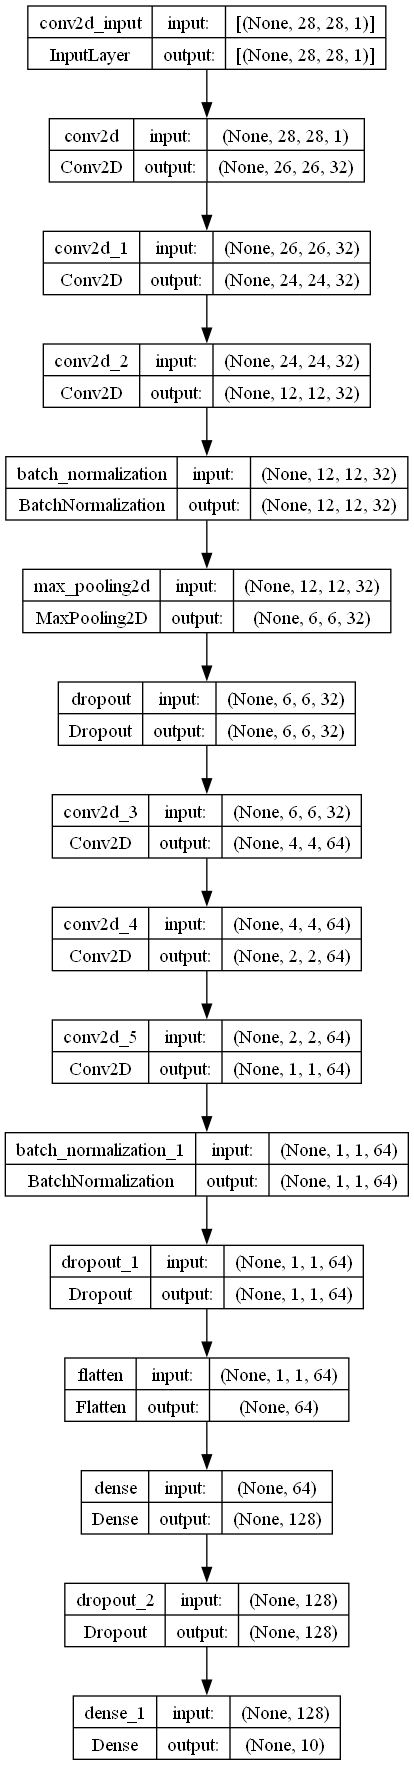

In [11]:
from tensorflow.keras.utils import plot_model
import pydot

plot_model(model, to_file='network_structure.png', show_shapes=True)

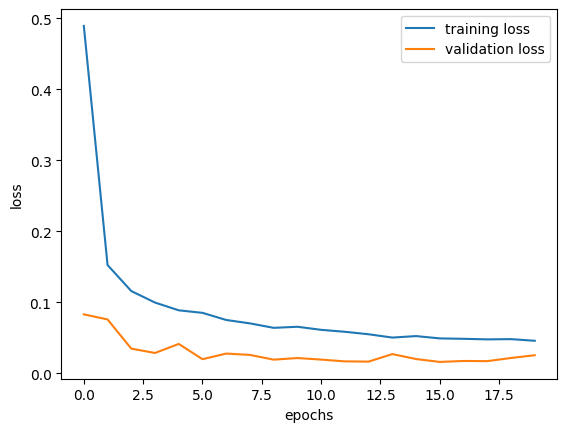

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [12]:

outputs=model.predict(x_test)
labels_predicted=np.argmax(outputs, axis=1)
correct_classified=sum(labels_predicted==labels_test)
print('Percentage correctly classified MNIST= ',100*correct_classified/labels_test.size) #99.35

313/313 [==============================] - 2s 6ms/step
Percentage correctly classified MNIST=  99.61


313/313 [==============================] - 2s 6ms/step


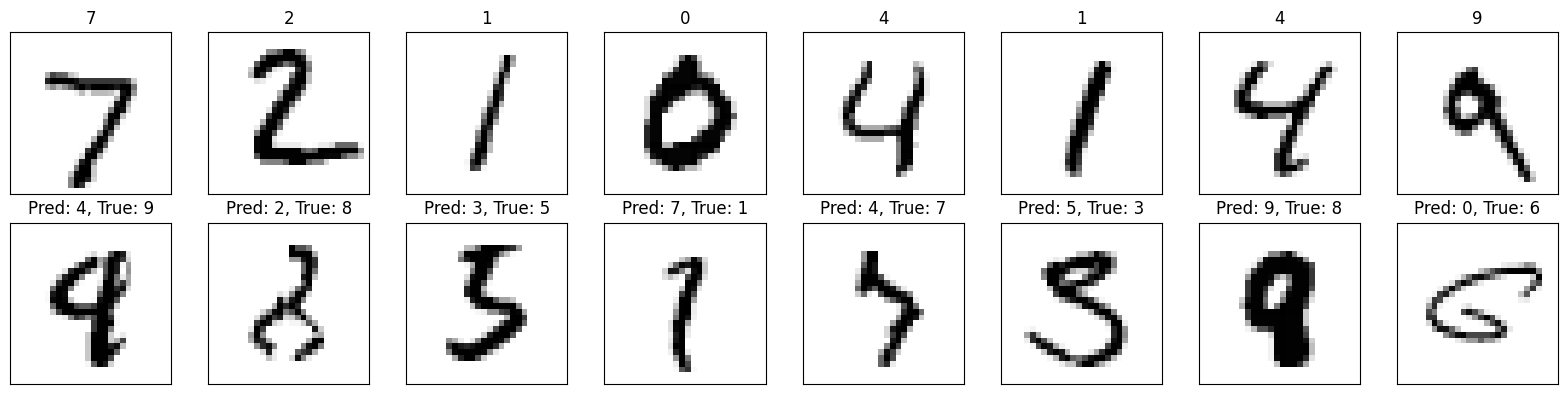

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions for the test set
outputs = model.predict(x_test)
labels_predicted = np.argmax(outputs, axis=1)

# Find indices of correctly and incorrectly predicted samples
correct_indices = np.where(labels_predicted == labels_test)[0]
incorrect_indices = np.where(labels_predicted != labels_test)[0]

# Plot 8 correctly predicted figures
plt.figure(figsize=(16, 4))
for i, idx in enumerate(correct_indices[:8]):
    ax = plt.subplot(2, 8, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap=plt.get_cmap('gray_r'))
    plt.title(labels_predicted[idx])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Plot 8 incorrectly predicted figures
for i, idx in enumerate(incorrect_indices[:8]):
    ax = plt.subplot(2, 8, 8 + i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap=plt.get_cmap('gray_r'))
    plt.title("Pred: {}, True: {}".format(
        labels_predicted[idx], labels_test[idx]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

313/313 [==============================] - 3s 10ms/step


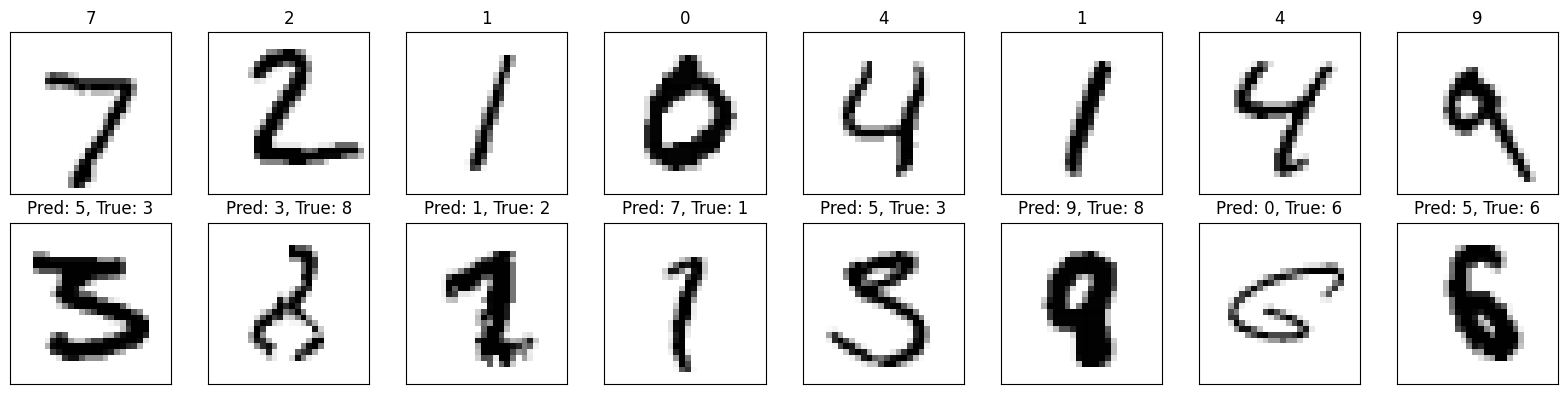

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions for the test set
outputs = model2.predict(x_test)
labels_predicted = np.argmax(outputs, axis=1)

# Find indices of correctly and incorrectly predicted samples
correct_indices = np.where(labels_predicted == labels_test)[0]
incorrect_indices = np.where(labels_predicted != labels_test)[0]

# Plot 8 correctly predicted figures
plt.figure(figsize=(16, 4))
for i, idx in enumerate(correct_indices[:8]):
    ax = plt.subplot(2, 8, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap=plt.get_cmap('gray_r'))
    plt.title(labels_predicted[idx])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Plot 8 incorrectly predicted figures
for i, idx in enumerate(incorrect_indices[:8]):
    ax = plt.subplot(2, 8, 8 + i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap=plt.get_cmap('gray_r'))
    plt.title("Pred: {}, True: {}".format(
        labels_predicted[idx], labels_test[idx]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()